# Multi Linear Regression Assignment Q1

### Q1) Consider only the below columns and prepare a prediction model for predicting Price.
###        Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#Import the data 
data = pd.read_csv('ToyotaCorolla.csv', encoding = 'latin_1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## EDA

In [3]:
#Filter the listed columns in the question only ("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")
#data1 = pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]], axis=1)
#data1.head()
data1 = data.filter(["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"], axis=1)
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
data1.info() #No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
Price            1436 non-null int64
Age_08_04        1436 non-null int64
KM               1436 non-null int64
HP               1436 non-null int64
cc               1436 non-null int64
Doors            1436 non-null int64
Gears            1436 non-null int64
Quarterly_Tax    1436 non-null int64
Weight           1436 non-null int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
#Update the column names to be meaningful and easy to use
data2 = data1.rename({'Age_08_04':'Age', 'cc':'CC','Quarterly_Tax':'QT', 'Weight':'WT'}, axis = 1)
data2.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
#Check if there are any duplicate rows
data2[data2.duplicated() == True]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
#Remove the duplictae rows
data3 = data2.drop_duplicates().reset_index(drop=True)
data3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
data3.shape                                                   

(1435, 9)

In [9]:
data3. describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Correlation Analysis

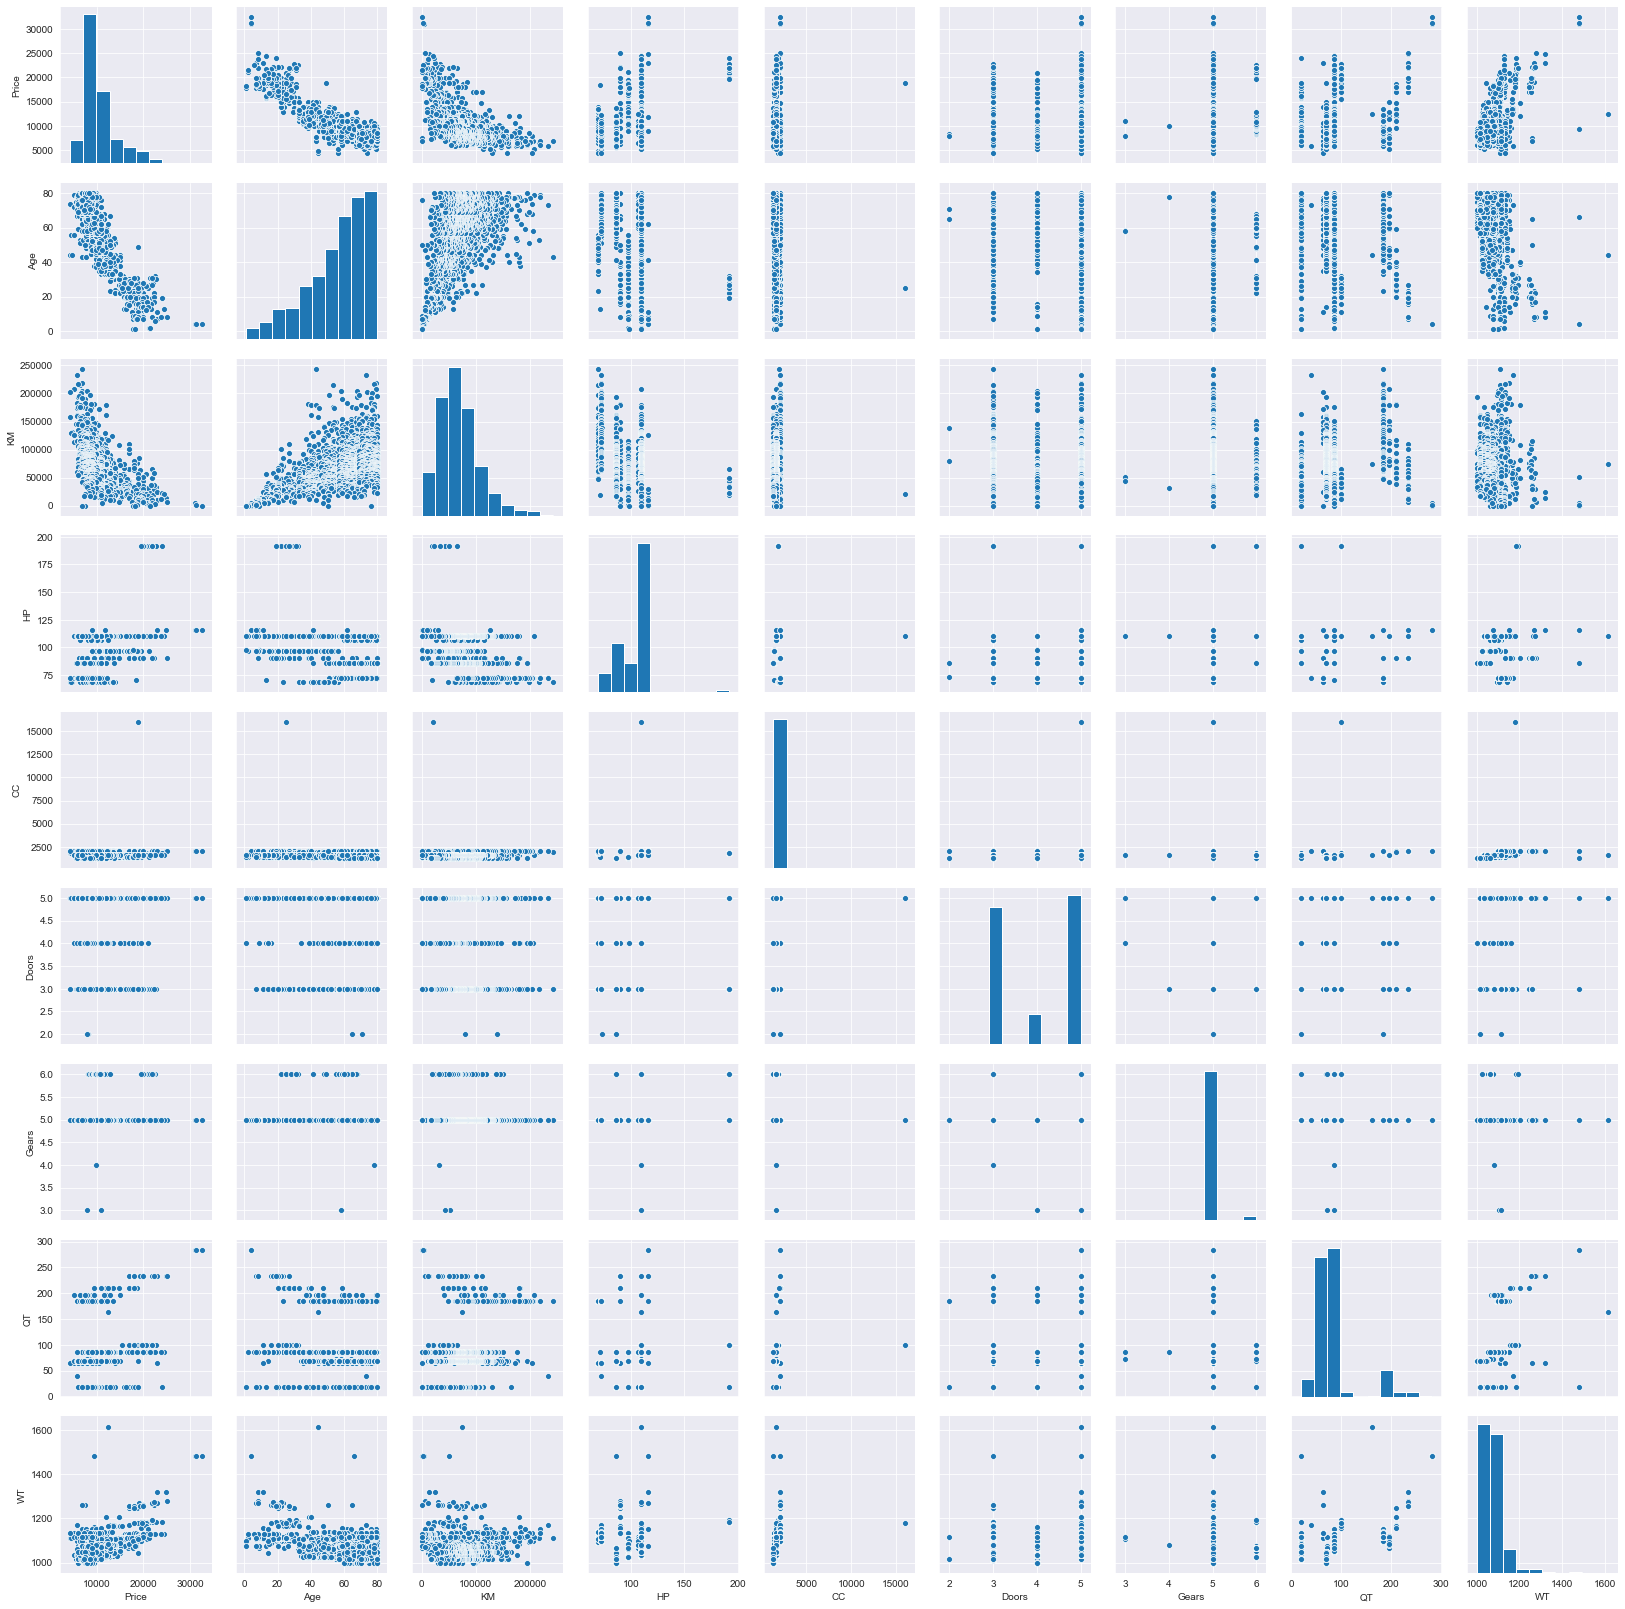

In [10]:
# Plot the pair plots to see if there is any linearity between the varaibles
sns.set_style(style='darkgrid')
sns.pairplot(data3)


In [11]:
# Calculating the strength of correlation
data3.iloc[:,1:10].corr() # No high correlation between the predictors

,Age,KM,HP,CC,Doors,Gears,QT,WT
Age,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


## Building the model

In [12]:
#Build the model
model= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data=data3)
model_fit = model.fit()

## Model Evaluation:

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:29:02   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Model coefficient parameters
model_fit.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
WT             16.855470
dtype: float64

In [15]:
#Model p-values
np.round(model_fit.pvalues,5)

Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
WT           0.00000
dtype: float64

In [16]:
#Model accuracy
model_fit.rsquared, model_fit.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [17]:
#Check why the p-values of CC and doors are high.
#individual plots of simple linear regression
model2 = smf.ols('Price~CC', data = data3)
model2_fit = model2.fit()
np.round(model2_fit.pvalues,6)

Intercept    0.000000
CC           0.000002
dtype: float64

In [18]:
model3 = smf.ols('Price~Doors',data = data3)
model3_fit = model3.fit()
np.round(model3_fit.pvalues,6)

Intercept    0.0
Doors        0.0
dtype: float64

In [19]:
model3 = smf.ols('Price~CC+Doors',data = data3)
model3_fit = model3.fit()
np.round(model3_fit.pvalues,6)
#No Correllation between CC and Doors individually or together

Intercept    0.000000
CC           0.000021
Doors        0.000000
dtype: float64

## Model validation:
### 1. Check Colinearity: VIF method

In [20]:
#Build models to check the multi colinearlity between the preictors. 
rsq_Age= smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT', data=data3).fit()
vif_Age = 1/(1-rsq_Age.rsquared)
rsq_KM= smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT', data=data3).fit()
vif_KM = 1/(1-rsq_KM.rsquared)
rsq_HP= smf.ols('HP~KM+Age+CC+Doors+Gears+QT+WT', data=data3).fit()
vif_HP = 1/(1-rsq_HP.rsquared)
rsq_CC= smf.ols('CC~KM+HP+Age+Doors+Gears+QT+WT', data=data3).fit()
vif_CC = 1/(1-rsq_CC.rsquared)
rsq_Doors= smf.ols('Doors~KM+HP+CC+Age+Gears+QT+WT', data=data3).fit()
vif_Doors = 1/(1-rsq_Doors.rsquared)
rsq_Gears= smf.ols('Gears~KM+HP+CC+Doors+Age+QT+WT', data=data3).fit()
vif_Gears = 1/(1-rsq_Gears.rsquared)
rsq_QT= smf.ols('QT~KM+HP+CC+Doors+Gears+Age+WT', data=data3).fit()
vif_QT = 1/(1-rsq_QT.rsquared)
rsq_WT= smf.ols('WT~KM+HP+CC+Doors+Gears+QT+Age', data=data3).fit()
vif_WT = 1/(1-rsq_WT.rsquared)
vif_all= pd.DataFrame({'Variables':['Age','KM','HP','CC','Doors','Gears','QT','WT'],
    'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_WT]})
vif_all

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,WT,2.487180


In [21]:
#None of the VIF >20, consider all are relevent features

### 2. Residual Analysis

In [22]:
import statsmodels.api as sm

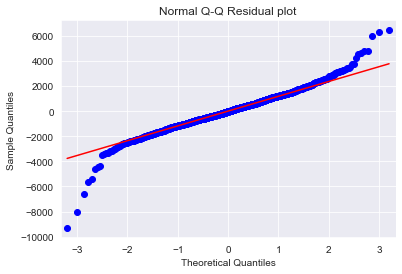

In [23]:
#Residual analysis(Normality check)
#Use Q-Q plot
sm.qqplot(model_fit.resid,line='q') #q- Theoritical line
plt.title('Normal Q-Q Residual plot')
plt.show()
#Most of the points are on the line, hence the residuals are normally distributed.

In [24]:
# outliers from above graph
np.where(model_fit.resid > 6000)# Residula points > 6000

(array([109, 146, 522], dtype=int64),)

In [25]:
np.where(model_fit.resid < -6000) # Residula points <-6000

(array([220, 600, 959], dtype=int64),)

### Homoscedasticity or Hetroscedasticity- Model validation

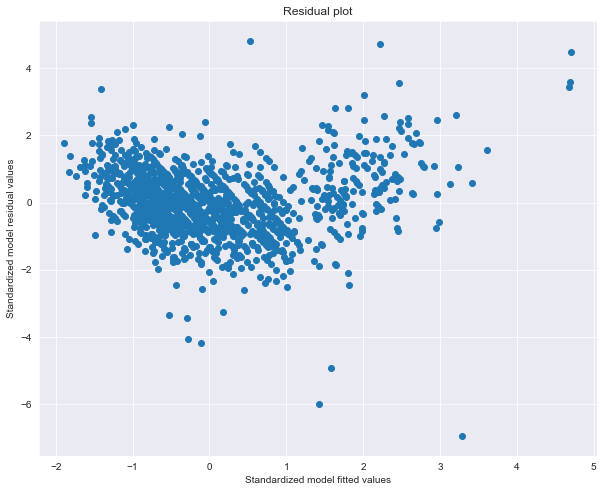

In [26]:
#Residual plots for Homoscedasticity or Hetroscedasticity
#Scatter plot between model_fit.fittedvalues and model_fit.resid
#Standardize the values
# def a function to standardize
def get_stan_vals(vals):
    return((vals-vals.mean())/vals.std())
#plot a scatter plot
fig = plt.figure(figsize=(10,8))
plt.scatter(get_stan_vals(model_fit.fittedvalues),get_stan_vals(model_fit.resid),figure=fig)
plt.title('Residual plot')
plt.xlabel('Standardized model fitted values')
plt.ylabel('Standardized model residual values')
plt.show()

In [27]:
# mu is nearly around 0, No patterns found. The modelis performing reasonably better

 ## Residuals vs Regressors plots

In [28]:
# Residuals vs Regressors  # each column with y
# using Residual-Regression Plots, code: graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

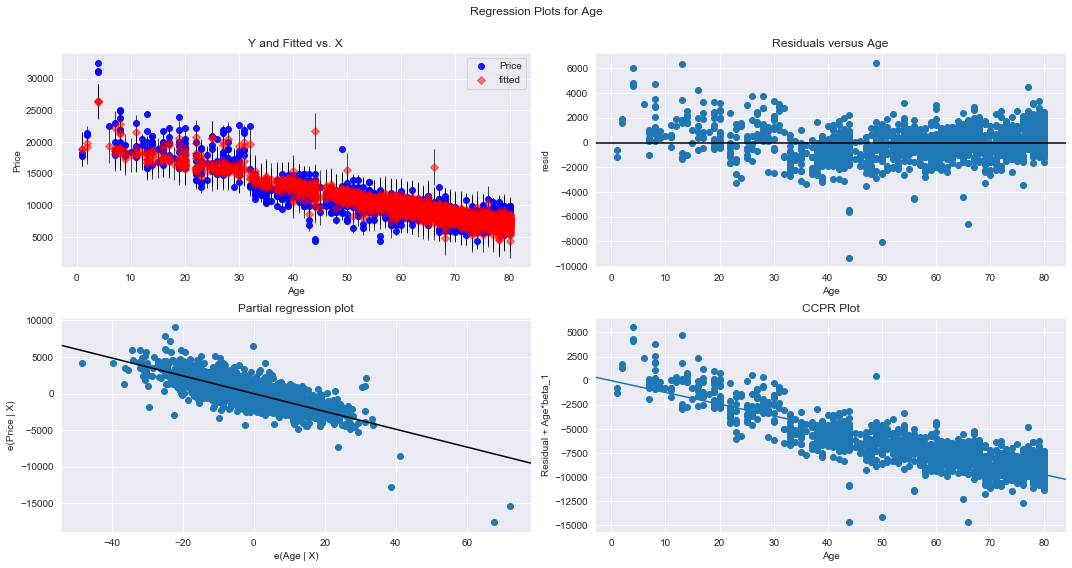

In [29]:
fig = plt.figure(figsize=(15,8))
#plot for Age
sm.graphics.plot_regress_exog(model_fit,'Age',fig = fig)
plt.show()

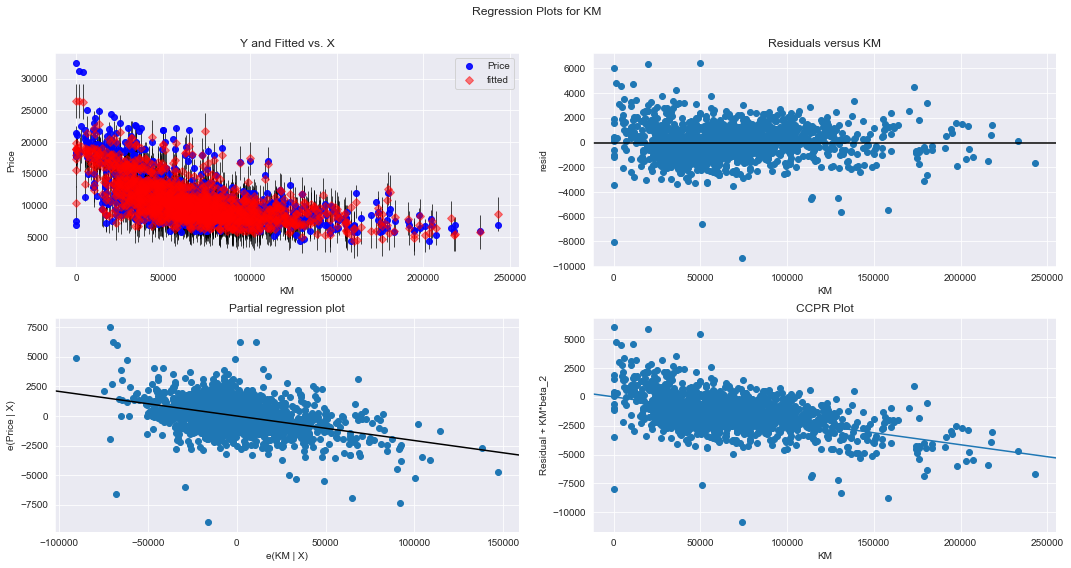

In [30]:
fig = plt.figure(figsize=(15,8))
#plot for KM
sm.graphics.plot_regress_exog(model_fit,'KM',fig = fig)
plt.show()

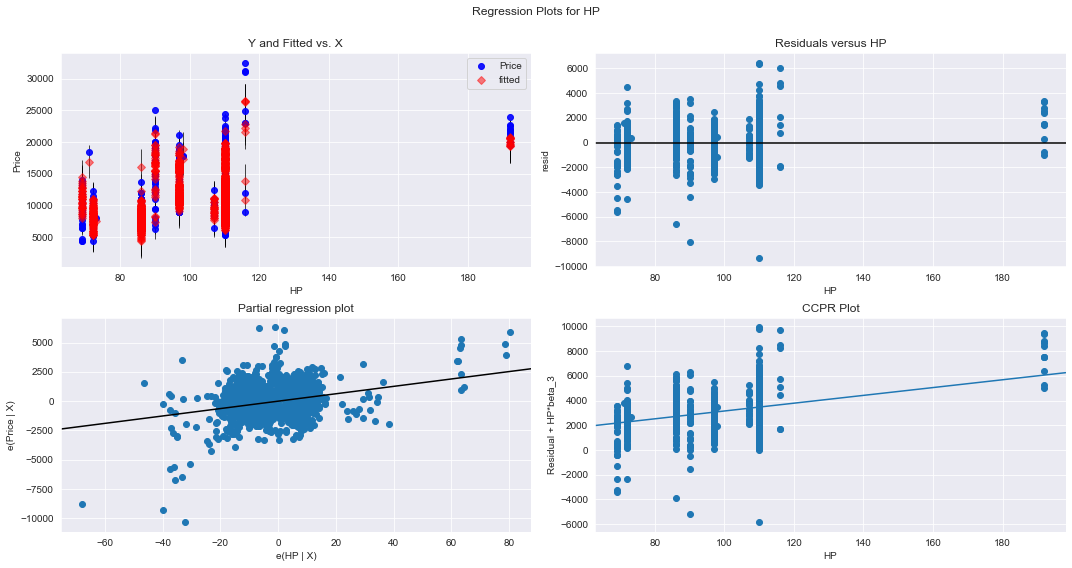

In [31]:
fig = plt.figure(figsize=(15,8))
#plot for HP
sm.graphics.plot_regress_exog(model_fit,'HP',fig = fig)
plt.show()

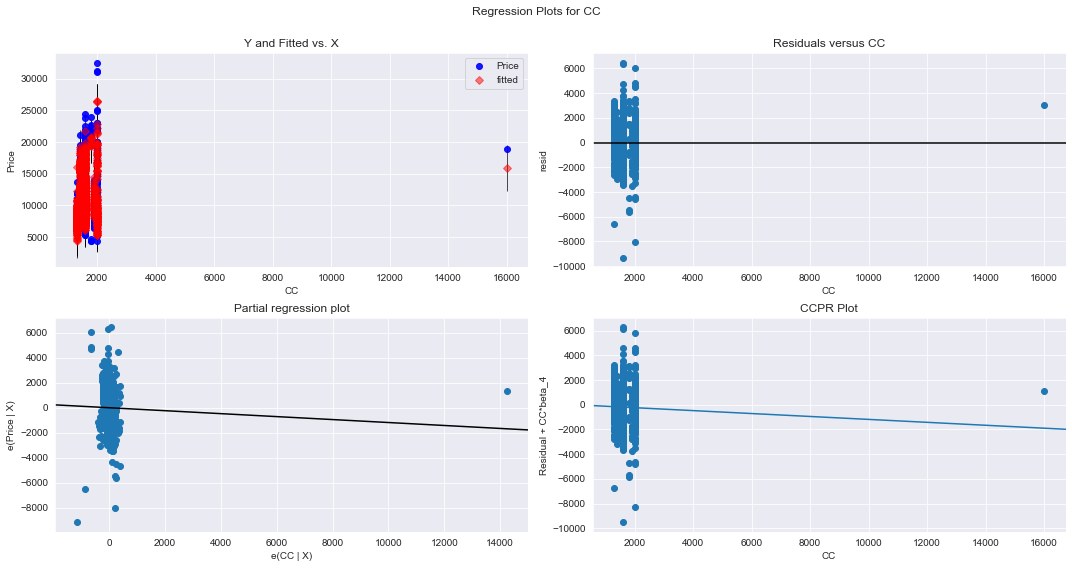

In [32]:
fig = plt.figure(figsize=(15,8))
#plot for CC
sm.graphics.plot_regress_exog(model_fit,'CC',fig = fig)
plt.show()

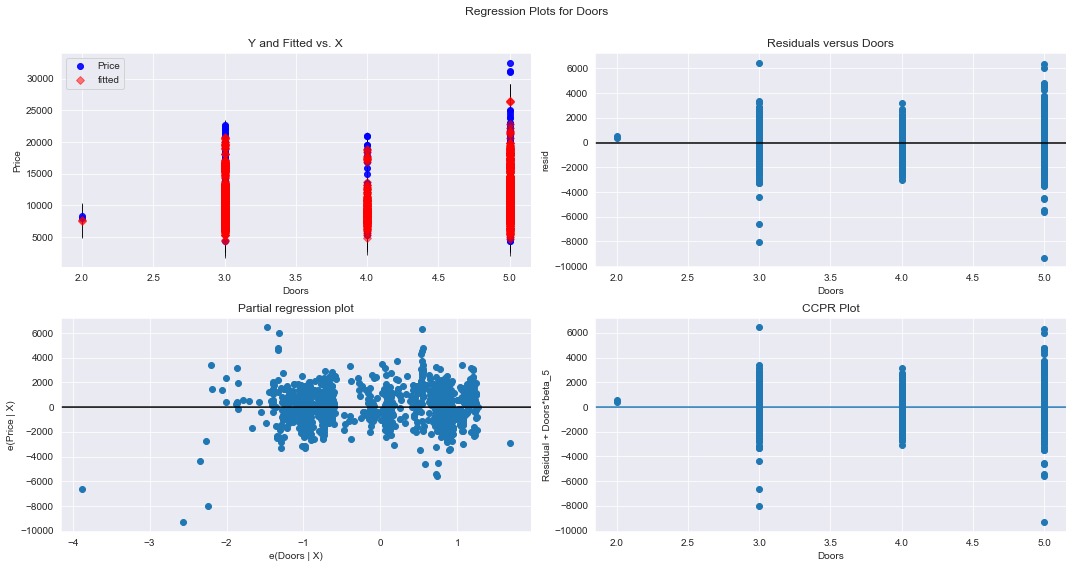

In [33]:
fig = plt.figure(figsize=(15,8))
#plot for Doors
sm.graphics.plot_regress_exog(model_fit,'Doors',fig = fig)
plt.show()

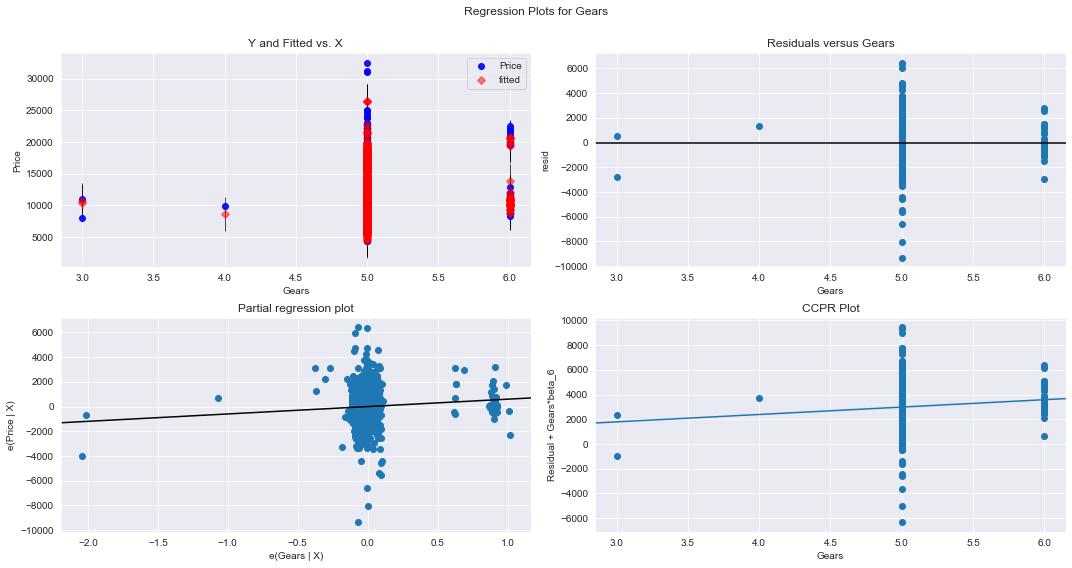

In [34]:
fig = plt.figure(figsize=(15,8))
#plot for Gears
sm.graphics.plot_regress_exog(model_fit,'Gears',fig = fig)
plt.show()

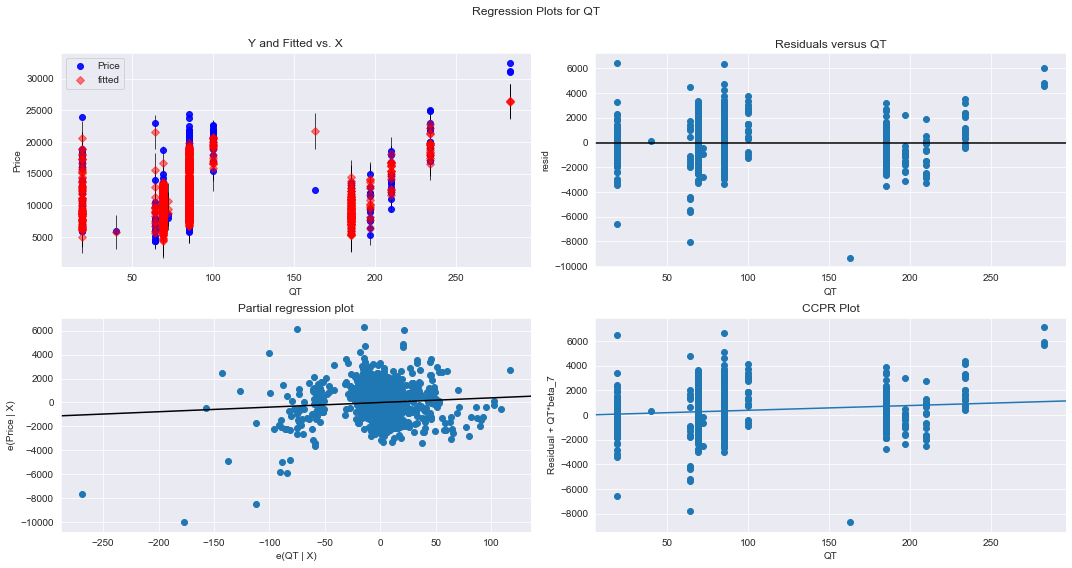

In [35]:
fig = plt.figure(figsize=(15,8))
#plot for QT
sm.graphics.plot_regress_exog(model_fit,'QT',fig = fig)
plt.show()

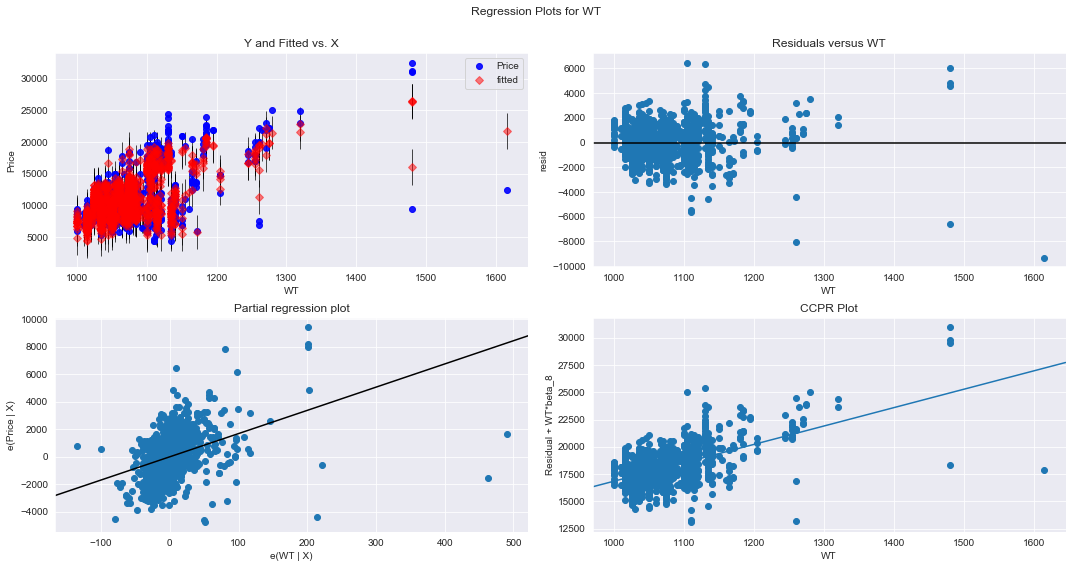

In [36]:
fig = plt.figure(figsize=(15,8))
#plot for WT
sm.graphics.plot_regress_exog(model_fit,'WT',fig = fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
### 1. Cook's Distance

In [37]:
# Cook's Distance- Get influencers using cooks distence
(c,_)=model_fit.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(*args, **kw)>

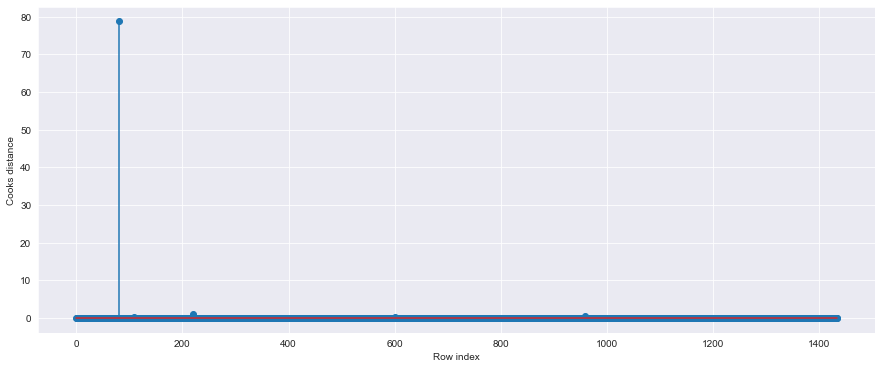

In [38]:
#Use stemplot
fig = plt.figure(figsize= (15,6))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.title = 'Stem plot to identify influencers'
plt.show

In [39]:
# Index and value of influencer (where C>0.5)
np.argmax(c) , np.max(c)

(80, 78.72950582247482)

### 2. Leverage value

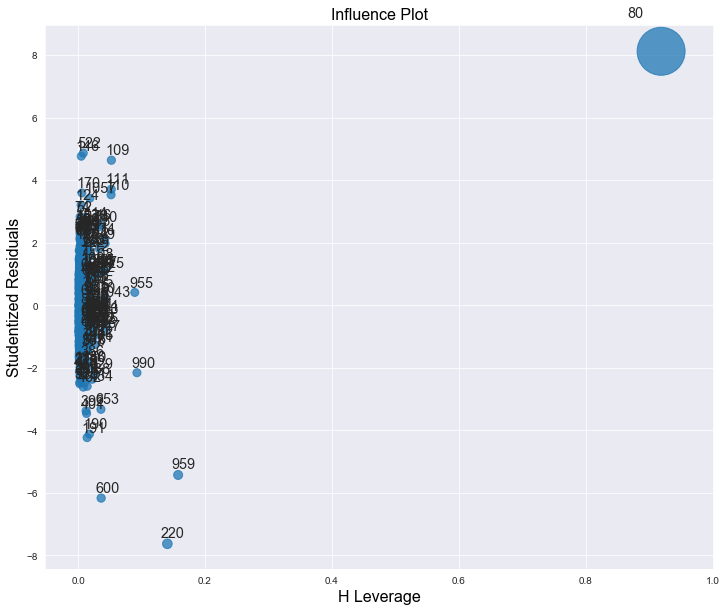

In [40]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
#Use influence plot
#influence_plot(model_fit)
#plt.show
fig,ax=plt.subplots(figsize=(12,10))
fig=influence_plot(model_fit,ax = ax)

In [41]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
n = data3.shape[0]
k = data3.shape[1]
l_cutoff = 3*(k+1)/n
l_cutoff

0.020905923344947737

In [42]:
#From the above plot, it is evident that points beyond leverage cutoff value=0.020905 are the outliers

In [43]:
data3.loc[80]

Price    18950
Age         25
KM       20019
HP         110
CC       16000
Doors        5
Gears        5
QT         100
WT        1180
Name: 80, dtype: int64

## Improving the model

In [44]:
# Creating a copy of data so that original dataset is not affected
data3_new = data3.copy()
data3_new.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [45]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data4 = data3_new.drop(data3_new.index[[80]],axis=0).reset_index(drop=True)
data4

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Model Deletion Diagnostics

#### If you want to continue improving model by removing the influencers upto the max cooks distance of 0.5 then using the following, we can acheive some accuracy

In [46]:
#Remove the fluencers >0.5 and get the accuracy
while np.max(c) > .5:
    data4 = data4.drop(data4.index[[np.argmax(c)]],axis=0).reset_index(drop=True) 
    model_fit = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data=data4).fit()
    (c,_)=model_fit.get_influence().cooks_distance
    np.argmax(c) , np.max(c)
    print('Improved model accuracy after removing the max cook distance ponit', np.max(c), 'is', model_fit.rsquared)

Improved model accuracy after removing the max cook distance ponit 2.2243922310562643 is 0.8679134779362867
Improved model accuracy after removing the max cook distance ponit 2.529909435853519 is 0.8764046306635496
Improved model accuracy after removing the max cook distance ponit 0.31668859869010646 is 0.8837942696149219


#### if you still want to improve the accuracy to a desired value without setting any limit for cooks distance, Use the following

In [47]:
# Accuracy deisred is .90, building the model by remove all the influencers until we get the desired accuracy
while model_fit.rsquared < 0.90:
    model_fit=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=data4).fit()
    (c,_)=model_fit.get_influence().cooks_distance
    np.argmax(c) , np.max(c)
    data4=data4.drop(data4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    print('Final accuracy after removing the max cook distance ponit', np.max(c), 'is',model_fit.rsquared)

Final accuracy after removing the max cook distance ponit 0.31668859869010646 is 0.8837942696149219
Final accuracy after removing the max cook distance ponit 0.16022908568605707 is 0.8880711544745218
Final accuracy after removing the max cook distance ponit 0.11617639443218644 is 0.8900925958801076
Final accuracy after removing the max cook distance ponit 0.04785293454557981 is 0.8908253216072246
Final accuracy after removing the max cook distance ponit 0.046323407154967314 is 0.8920979539178565
Final accuracy after removing the max cook distance ponit 0.045732508688853 is 0.8932033556172324
Final accuracy after removing the max cook distance ponit 0.03973992112605192 is 0.8945578493148989
Final accuracy after removing the max cook distance ponit 0.03443623159283465 is 0.8953671188551237
Final accuracy after removing the max cook distance ponit 0.03278588671412129 is 0.8928549552865381
Final accuracy after removing the max cook distance ponit 0.03217395481494232 is 0.8937898677669761
F

Final accuracy after removing the max cook distance ponit 0.006616607663084241 is 0.8963687329005806
Final accuracy after removing the max cook distance ponit 0.00625243191462189 is 0.8968000465301622
Final accuracy after removing the max cook distance ponit 0.006005020668696863 is 0.8972516139948025
Final accuracy after removing the max cook distance ponit 0.006252937449904754 is 0.8974997153722647
Final accuracy after removing the max cook distance ponit 0.005815608011449406 is 0.8977424273484291
Final accuracy after removing the max cook distance ponit 0.005536480598047955 is 0.8978047164579838
Final accuracy after removing the max cook distance ponit 0.005367537400674835 is 0.8980163583933244
Final accuracy after removing the max cook distance ponit 0.005452633395477628 is 0.898348261028911
Final accuracy after removing the max cook distance ponit 0.0055129913845568595 is 0.898676101300119
Final accuracy after removing the max cook distance ponit 0.005461180750688616 is 0.898609629

## Final Model

In [48]:
# Build the final model with the optimized data 
final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data=data4).fit()
final_model.rsquared , final_model.aic
print("Thus model final  accuracy is improved to",final_model.rsquared)
print("Thus model final  AIC is",final_model.aic)

Thus model final  accuracy is improved to 0.9001608603048132
Thus model final  AIC is 22075.610709374956


In [49]:
#Accuracy of final model
final_model.rsquared # Model Accuracy is increased to 90.00%

0.9001608603048132

In [50]:
#Final optimized data
data4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245


## Model Predictions

In [51]:
# Model predictions
pred = pd.DataFrame({'Age':20,'KM':50000,'HP':100,'CC':2000,'Doors':4, 'Gears': 5,'QT':230, 'WT':1250},index=[0])
pred

,Age,KM,HP,CC,Doors,Gears,QT,WT
0,20,50000,100,2000,4,5,230,1250


In [52]:
final_model.predict(pred)

0    18868.481271
dtype: float64

In [54]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data4)
pred_y.head()

0    15352.617848
1    15412.962094
2    15311.429309
3    14747.581034
4    17540.153123
dtype: float64